In [1]:
from datascience import *
%matplotlib inline
path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

# Percentis
Dados numéricos podem ser classificados em ordem crescente ou decrescente. Assim, os valores de um conjunto de dados numéricos têm uma *ordem de classificação*. Um percentil é o valor em uma posição específica dessa ordem.

Por exemplo, se sua pontuação em um teste está no 95º percentil, uma interpretação comum é que apenas 5% das pontuações foram superiores à sua. A mediana é o 50º percentil; é comumente assumido que 50% dos valores em um conjunto de dados estão acima da mediana.

Mas algum cuidado é necessário para dar aos percentis uma definição precisa que funcione para todos os rankings e todas as listas. Para entender por que isso é importante, considere um exemplo extremo em que todos os estudantes de uma classe obtêm 75 em um teste. Então, 75 é um candidato natural para a mediana, mas não é verdade que 50% das pontuações estão acima de 75. Além disso, 75 é um candidato igualmente natural para o 95º percentil, o 25º ou qualquer outro percentil. Empates - ou seja, valores de dados iguais - precisam ser levados em conta ao definir percentis.

Também é necessário ter cuidado quanto à posição exata na lista ao calcular percentis quando o índice relevante não está claro. Por exemplo, qual deveria ser o 87º percentil de uma coleção de 10 valores? O 8º valor da coleção ordenada, ou o 9º, ou em algum lugar entre eles?

Nesta seção, daremos uma definição que funcione consistentemente para todos os rankings e todas as listas.

## Um Exemplo Numérico
Antes de darmos uma definição geral de todos os percentis, vamos definir o 80º percentil de uma coleção de valores como o menor valor na coleção que é pelo menos tão grande quanto 80% de todos os valores.

Por exemplo, vamos considerar os tamanhos dos cinco maiores continentes - África, Antártica, Ásia, América do Norte e América do Sul - arredondados para o milhão mais próximo de milhas quadradas.

In [2]:
sizes = make_array(12, 17, 6, 9, 7)

O percentil 80 é o menor valor que é pelo menos tão grande quanto 80% dos elementos de 'tamanhos', ou seja, quatro quintos dos cinco elementos. Isso é 12:

In [3]:
np.sort(sizes)

array([ 6,  7,  9, 12, 17])

O 80º percentil é um valor da lista, ou seja, 12. Você pode ver que 80% dos valores são menores ou iguais a ele e que é o menor valor da lista para o qual isso é verdade.

De forma análoga, o percentil 70 é o menor valor na coleção que é pelo menos tão grande quanto 70% dos elementos de `sizes`. Agora, 70% de 5 elementos são "3,5 elementos", então o percentil 70 é o Quarto elemento da lista É 12, o mesmo que o 80º percentil para esses dados.

## A função `percentile`
A função `percentil` leva dois argumentos: uma classificação entre 0 e 100 e uma matriz. Ela retorna o percentil correspondente do array.

In [4]:
percentile(70, sizes)

12

### A Definição Geral ###

Seja $p$ um número entre 0 e 100. O percentil $p$ de uma coleção é o menor valor na coleção que é pelo menos tão grande quanto $p\%$ de todos os valores.

Por esta definição, qualquer percentil entre 0 e 100 pode ser calculado para qualquer coleção de valores, e ele sempre é um elemento da coleção.

Em termos práticos, suponha que há $n$ elementos na coleção. Para encontrar o percentil $p$:
- Ordene a coleção em ordem crescente.
- Encontre p% de n: $(p/100) \times n$. Chame isso de $k$.
- Se $k$ for um número inteiro, pegue o $k$-ésimo elemento da coleção ordenada.
- Se $k$ não for um número inteiro, arredonde para cima para o próximo inteiro e pegue esse elemento da coleção ordenada.

### Exemplo ###
A tabela `scores_and_sections` contém uma linha para cada estudante em uma turma de 359 alunos. As colunas são a seção de discussão do aluno e a nota da prova.

In [5]:
scores_and_sections = Table.read_table(path_data + 'scores_by_section.csv')
scores_and_sections

Section,Midterm
1,22
2,12
2,23
2,14
1,20
3,25
4,19
1,24
5,8
6,14


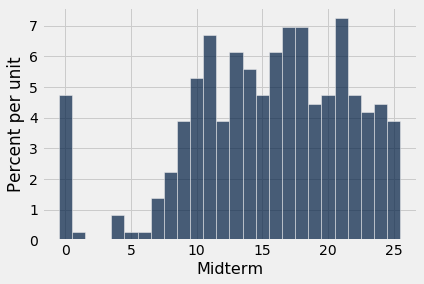

In [6]:
scores_and_sections.select('Midterm').hist(bins=np.arange(-0.5, 25.6, 1))

Qual foi o percentil 85 das pontuações? Para usar a função `percentile`, crie um array `scores` contendo as pontuações intermediárias e encontre o percentil 85:

In [7]:
scores = scores_and_sections.column(1)

In [8]:
percentile(85, scores)

22

De acordo com a função percentil, o percentil 85 era 22. Para verificar se isso é consistente com a nossa nova definição, vamos aplicar a definição diretamente.

Primeiro, coloque as pontuações em ordem crescente:

In [9]:
sorted_scores = np.sort(scores_and_sections.column(1))

Existem 359 pontuações no array. A seguir, encontre 85% de 359, que é 305,15.

In [10]:
0.85 * 359

305.15

Isso não é um número inteiro. Pela nossa definição, o 85º percentil é o 306º elemento de `sorted_scores`, que, pela convenção de indexação do Python, é o item 305 do array.

In [11]:
# O 306º elemento do array classificado

sorted_scores.item(305)

22

Essa é a mesma resposta que obtivemos usando `percentile`. No futuro, usaremos apenas `percentile`.

## Quartis
O *primeiro quartil* de uma coleção numérica é o 25º percentil. A terminologia surge do *primeiro quarto*. O segundo quartil é a mediana, e o terceiro quartil é o 75º percentil.

Para os dados de `scores`, esses valores são:

In [12]:
percentile(25, scores)

11

In [13]:
percentile(50, scores)

16

In [14]:
percentile(75, scores)

20

As distribuições das pontuações às vezes são resumidas pelo intervalo de "50% intermediários", entre o primeiro e o terceiro quartis.